# Python -  Multiple Linear Regression
1. Data Load
    * Convert categorical values to numeric
2. Find Correlation
3. Model 
    * Split Data into train and test set
    * Train the Model
    * Predict the target varaibles
    * Evaluate the model 
    * Determine the Root Mean Square Error,R2 score
    * Predict a value
4. Conculsion





## Problem
**Can we predict CO2 Emmision based on FuelConsumption, EngineSize,VehicleClass, Model and Cylinders of car**

FuelConsumption.csv contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

There are multiple variables that predict the Co2emission. 
For this project we will predict co2emission using FuelConsumption, EngineSize,VehicleClass, Model and Cylinders for cars.

# Import Libraries

In [ ]:
!pip install prettytable
print("Complete")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable 
%matplotlib inline
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

print("imported")

imported


## Load DataSet 

In [69]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [70]:
# Check the datatypes to make sure independant and target variables are not categorical
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

### Convert categorical values to numeric


In [72]:
df[["VEHICLECLASS_code", "MODEL_code","MAKE_CODE"]] = df[["VEHICLECLASS", "MODEL", "MAKE"]].apply(lambda col:pd.Categorical(col).codes)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_code,MODEL_code,MAKE_CODE
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,329,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,329,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,330,0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,11,389,0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,11,483,0


In [50]:
### create a dataset with columns required for the model

In [74]:
df_mlr = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS',"VEHICLECLASS_code", "MODEL_code","FUELCONSUMPTION_COMB_MPG","MAKE_CODE"]]
df_mlr.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_code,MODEL_code,FUELCONSUMPTION_COMB_MPG,MAKE_CODE
0,2.0,4,8.5,196,0,329,33,0
1,2.4,4,9.6,221,0,329,29,0
2,1.5,4,5.9,136,0,330,48,0
3,3.5,6,11.1,255,11,389,25,0
4,3.5,6,10.6,244,11,483,27,0


## Correlation
**check if there is corrleation between CO2 Emmision and engine size**
1. .00-.19 “very weak”
2. .20-.39 “weak”
3. .40-.59 “moderate”
4. .60-.79 “strong”
5. .80-1.0 “very strong”

In [75]:
df_mlr.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_code,MODEL_code,FUELCONSUMPTION_COMB_MPG,MAKE_CODE
ENGINESIZE,1.000000,0.934011,0.819482,0.874154,0.240529,0.096304,-0.808554,-0.166416
CYLINDERS,0.934011,1.000000,0.776788,0.849685,0.208528,0.080010,-0.770430,-0.203427
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129,0.384678,0.161373,-0.927965,-0.222273
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000,0.388468,0.155492,-0.906394,-0.186504
VEHICLECLASS_code,0.240529,0.208528,0.384678,0.388468,1.000000,0.244648,-0.354073,0.005853
MODEL_code,0.096304,0.080010,0.161373,0.155492,0.244648,1.000000,-0.148806,0.039068
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.927965,-0.906394,-0.354073,-0.148806,1.000000,0.226347
MAKE_CODE,-0.166416,-0.203427,-0.222273,-0.186504,0.005853,0.039068,0.226347,1.000000


**Correlation Value is close to 1 and the two columns are correlated**

# Model 1
## Split Data into train and test set 

Create X and y 

A two-dimensional array with the inputs (x)
A one-dimensional array with the outputs (y)

train_size is the number that defines the size of the training set. If you provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used for testing. If you provide an int, then it will represent the total number of the training samples. The default value is None.

test_size is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

random_state is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

shuffle is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

stratify is an array-like object that, if not None, determines how to use a stratified split.

X = engine_Co2.iloc[:,:-1].values 
X

In [77]:
# Create target and independant variables
X = df_mlr[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB',"VEHICLECLASS_code", "MODEL_code", 
            "FUELCONSUMPTION_COMB_MPG", "MAKE_CODE"]].values.reshape(-1,7)
y = df_mlr['CO2EMISSIONS'].values.reshape(-1,1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.40, random_state=42)

## Train the model

In [79]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#retrieve the intercept:
print(regressor.intercept_)

# retrieve the slope:
print(regressor.coef_)

[247.41390004]
[[ 9.63186461e+00  7.02587155e+00  2.21930768e+00  8.77100399e-01
   4.76722535e-03 -3.69967869e+00  4.80131796e-02]]


## Predict the target varaibles

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
# displaying actual and predicted value side by sude 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,304,302.431494
1,221,241.230542
2,294,274.244240
3,221,232.795396
4,207,203.743988


## Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. 
Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [83]:
regressor.score(X, y)

0.8954177753667596

In [84]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test , y_pred) # The coefficient of determination: 1 is perfect prediction
  
x = PrettyTable()
x.field_names = ["Mean absolute error", "Residual sum of squares (MSE)", "Root Mean Squared Error", "R2-score"]
x.add_row([MAE, MSE, RMSE,R2])
#x.del_row(3)
print(x)


#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error new :', metrics.mean_squared_error(y_test, y_pred, squared=False))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

+---------------------+-------------------------------+-------------------------+--------------------+
| Mean absolute error | Residual sum of squares (MSE) | Root Mean Squared Error |      R2-score      |
+---------------------+-------------------------------+-------------------------+--------------------+
|  13.288590095694763 |       394.42920586767355      |    19.86024183809637    | 0.9045031455099309 |
+---------------------+-------------------------------+-------------------------+--------------------+


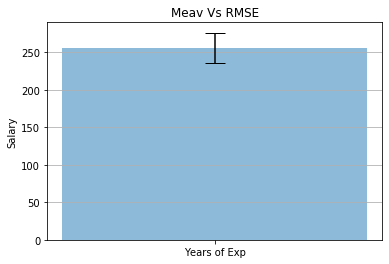

In [85]:
mean = df_mlr["CO2EMISSIONS"].mean()
CTEs = [mean]
error = [RMSE]
labels = ['Years of Exp']
x_pos = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Salary')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Meav Vs RMSE')
ax.yaxis.grid(True)
plt.show()